# 2. Coverage analysis – simulation study

This notebook reproduces the coverage analysis (Section 4.2) by computing conformal prediction intervals for **multiple α levels** and evaluating their empirical coverage across 200 Monte Carlo repetitions.

In [3]:
import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [4]:
sys.path.append(os.path.abspath(".."))
from src import coverage_simulation_study

In [5]:
df_california = fetch_california_housing(as_frame=True)
X = pd.DataFrame(df_california.data, columns=df_california.feature_names)
y = df_california.target
n = len(y)

## 1. Simulation

In [6]:
output_folder_path = '../data/output/coverage_sim_study/'

In [5]:
sim_results = coverage_simulation_study(dataset=df_california, n_iter=200)

df_results = pd.DataFrame(sim_results).T.reset_index()
df_results["seed"] = df_results["index"].str.extract(r"seed_(\d+)")
df_results["alpha"] = df_results["index"].str.extract(r"alpha_([\d.]+)")

df_results["seed"] = pd.to_numeric(df_results["seed"])
df_results["alpha"] = pd.to_numeric(df_results["alpha"])

df_results = df_results.drop("index", axis=1)
df_results.to_csv(output_folder_path + "simulation_coverage_california.csv", index=False)

Simulation Progress: 100%|██████████████████| 200/200 [1:16:07<00:00, 22.84s/it]


In [7]:
df_results = pd.read_csv(output_folder_path + "simulation_coverage_california.csv")

In [8]:
df_results

,coverage,sharpness,seed,alpha
0,0.999273,5.935820,0,0.001
1,0.987888,3.433899,0,0.010
2,0.945010,1.912908,0,0.050
3,0.901405,1.460971,0,0.100
4,0.807655,1.001232,0,0.200
...,...,...,...,...
995,0.998547,5.837382,199,0.001
996,0.986434,3.333259,199,0.010
997,0.949855,1.961221,199,0.050
998,0.896802,1.432348,199,0.100


## 2. Results

In [9]:
df_results.groupby("alpha")["coverage"].agg(
    coverage_mean="mean", coverage_std=lambda x: x.std(ddof=1)
).reset_index().round(3)

,alpha,coverage_mean,coverage_std
0,0.001,0.999,0.001
1,0.010,0.988,0.002
2,0.050,0.949,0.003
3,0.100,0.899,0.004
4,0.200,0.805,0.006


In [15]:
df_results

,coverage,sharpness,seed,alpha
0,0.999273,5.935820,0,0.001
1,0.987888,3.433899,0,0.010
2,0.945010,1.912908,0,0.050
3,0.901405,1.460971,0,0.100
4,0.807655,1.001232,0,0.200
...,...,...,...,...
995,0.998547,5.837382,199,0.001
996,0.986434,3.333259,199,0.010
997,0.949855,1.961221,199,0.050
998,0.896802,1.432348,199,0.100


In [10]:
figures_folder = "../figures/simulation_studies/"

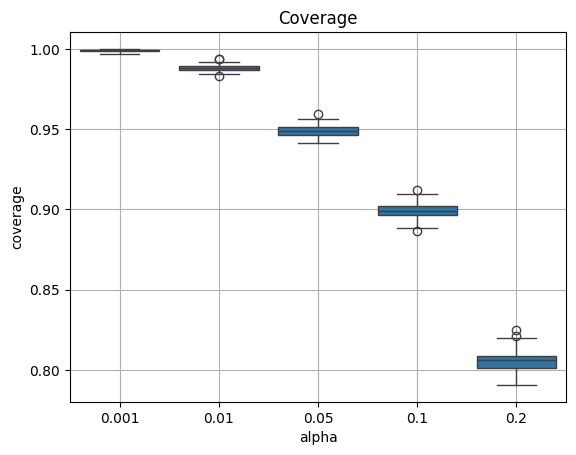

In [22]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=df_results, x="alpha", y="coverage", dodge=True)
ax.grid()
plt.title('Coverage')

plt.savefig(figures_folder + "/coverage_analysis/coverage.pdf") #, dpi=600)
plt.show()

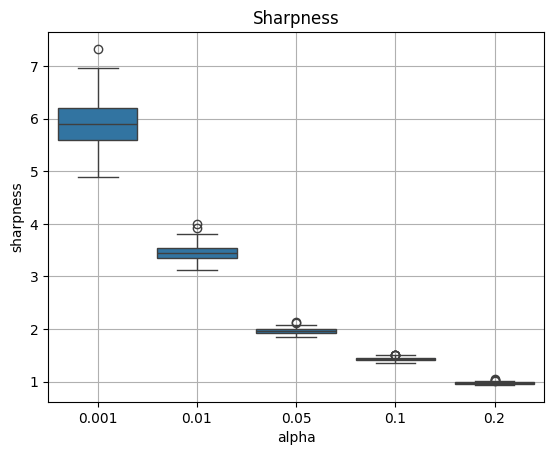

In [23]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=df_results, x="alpha", y="sharpness", dodge=True)
ax.grid()
plt.title('Sharpness')

plt.savefig(figures_folder + "/coverage_analysis/sharpness.pdf") #, dpi=600)
plt.show()